In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer, f1_score
from sklearn.inspection import permutation_importance
import shap
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
df = pd.read_csv("df_final.csv")
df.head()

,Intuition_Encoded,Age,Income,Employment_Status,High_Expectation,Industry_Experience,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,...,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,Field_Working_Education,Field_Working_Others,Field_Working_Self-employed,Field_Working_Software development and IT,Field_Working_unemployed,Job_Status_Expecation(Objective2),Job_Status_Income(Objective1)
0,3.0,35.0,2.0,1.0,1.0,1.0,4.0,2.0,24.0,5000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,3.0,27.0,2.0,1.0,1.0,1.0,4.0,10.0,50.0,200.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,3.0,24.0,2.0,1.0,1.0,1.0,6.0,5.0,36.0,10500.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,3.0,44.0,2.0,1.0,1.0,1.0,3.0,8.0,24.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,3.0,21.0,2.0,1.0,1.0,1.0,4.0,42.0,120.0,100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
# Remove the top five outliers for Money_Spent

for i in range(0,5):
    df = df[df['Money_Spent'] != df['Money_Spent'].max()]
df['Money_Spent'].max()

60000.0

In [ ]:
# Set our outcome variable
y = df['Job_Status_Income(Objective1)']

# Drop outcome variables, as well as any columns directly related to employment status
X = df.drop(columns=['Job_Status_Income(Objective1)','Job_Status_Expecation(Objective2)','Field_Working_Education','Field_Working_Others',
                    'Field_Working_Self-employed','Field_Working_Software development and IT','Field_Working_unemployed','Employment_Status',
                    'Laid_Off_Potential', 'Replacable_Job_Potential','Industry_Experience'])

# Check for correlated features
X.corr()

,Intuition_Encoded,Age,Income,High_Expectation,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,Count_Learning_Methods,Count_Online_Resources,In-person Events,Listen_Podcasts,Youtube_Channels,Months_Finding_New_Job,Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others
Intuition_Encoded,1.000000,0.090556,0.131706,0.173681,0.074111,0.088768,-0.007950,0.038722,0.047709,0.087075,0.005363,0.038103,0.058195,-0.065193,0.067286,-0.133764,0.032216,0.039132
Age,0.090556,1.000000,0.472274,0.176099,-0.024744,-0.003074,0.071883,0.087551,0.044170,0.034187,0.027638,0.067649,-0.051559,-0.185489,-0.067325,-0.264983,0.128787,0.185229
Income,0.131706,0.472274,1.000000,0.320787,-0.021986,-0.051267,0.037264,0.093026,0.005411,0.004011,0.023173,0.109020,-0.079252,-0.308171,-0.114075,-0.204240,0.121403,0.174181
High_Expectation,0.173681,0.176099,0.320787,1.000000,0.054478,0.044058,0.002223,0.063645,0.048509,0.073308,0.018385,0.059503,0.042241,-0.151163,-0.005273,-0.090252,0.027050,0.064555
Highest_Degree_Ordinal,0.074111,-0.024744,-0.021986,0.054478,1.000000,0.035889,-0.015719,-0.020973,0.003364,0.014880,-0.014916,-0.012909,0.046879,-0.044621,0.112736,-0.034717,-0.051379,-0.012498
Hours_Learning_Weekly,0.088768,-0.003074,-0.051267,0.044058,0.035889,1.000000,0.003143,0.057002,0.168984,0.217995,0.044667,0.058738,0.201024,-0.002225,0.071346,-0.027701,-0.008526,-0.026069
Months_Programming,-0.007950,0.071883,0.037264,0.002223,-0.015719,0.003143,1.000000,0.033600,0.100183,0.080608,0.064683,0.041263,0.031896,-0.010524,0.062263,-0.036212,-0.005009,-0.013582
Money_Spent,0.038722,0.087551,0.093026,0.063645,-0.020973,0.057002,0.033600,1.000000,0.162081,0.097161,0.092475,0.076442,0.045579,-0.020909,0.008835,-0.046415,-0.005509,0.042470
Count_Learning_Methods,0.047709,0.044170,0.005411,0.048509,0.003364,0.168984,0.100183,0.162081,1.000000,0.433904,0.346472,0.175988,0.235911,-0.008881,0.189234,-0.120344,-0.015277,-0.031345
Count_Online_Resources,0.087075,0.034187,0.004011,0.073308,0.014880,0.217995,0.080608,0.097161,0.433904,1.000000,0.181605,0.214664,0.462003,-0.010903,0.173116,-0.128563,0.000036,-0.024751


## Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Perform a grid search to identify the best parameters for the model

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

Best parameters found:  {'bootstrap': False, 'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score: 0.786


In [ ]:
# Build the model with the recommended parameters, and score it on training and test sets
clf = RandomForestClassifier(random_state=0, **grid_search.best_params_).fit(X_train, y_train)

# Calculate the F1 score for the training set
y_train_pred = clf.predict(X_train)
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate the F1 score for the test set
y_test_pred = clf.predict(X_test)
f1_test = f1_score(y_test, y_test_pred, average='weighted')

# Print the weighted F1 scores
print("F1 of RF classifier on training set: {:.3f}".format(f1_train))
print("F1 of RF classifier on test set: {:.3f}".format(f1_test))

F1 of RF classifier on training set: 0.985
F1 of RF classifier on test set: 0.797


In [ ]:
# Print a confusion matrix and classification report for additional insight into model performance

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[738   0  11   0]
 [  0 519 122   0]
 [141 237 171   0]
 [  0   0   0 840]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       749
           1       0.69      0.81      0.74       641
           2       0.56      0.31      0.40       549
           3       1.00      1.00      1.00       840

    accuracy                           0.82      2779
   macro avg       0.77      0.78      0.76      2779
weighted avg       0.80      0.82      0.80      2779



In [ ]:
# Calculate the F1 score with 10-fold cross-validation
f1_scorer = make_scorer(f1_score, average='weighted')
f1_scores = cross_val_score(clf, X, y, cv=10, scoring=f1_scorer)

# Print the F1 scores for each fold and the average score
print("F1 Scores for each fold: ", f1_scores)
print("Average F1 Score: {:.3f} + {:.3f}".format(f1_scores.mean(),f1_scores.std()))

F1 Scores for each fold:  [0.78602757 0.79064562 0.7963856  0.77654197 0.77313895 0.78460738
 0.76859233 0.78190617 0.79498776 0.80308206]
Average F1 Score: 0.786 + 0.010


## SVM Model

In [ ]:
# Define numerical features
numerical_features = ['Age', 'Hours_Learning_Weekly', 'Months_Programming',
                     'Money_Spent', 'Count_Learning_Methods', 'Count_Online_Resources',
                     'Youtube_Channels', 'Months_Finding_New_Job']

# Create preprocessor with StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create the pipeline
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svm', SVC(probability=True, random_state=0))  # Enable probability estimates
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define hyperparameter grid
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['rbf'],
    'svm__gamma': ['scale', 'auto', 0.1, 1, 10]
}

# Set up Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))

# Set the best parameters to the pipeline (not strictly necessary since fit already sets them)
pipe.set_params(**best_params)

# Now fit the pipeline to the training data
pipe.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:  {'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Best cross-validation score: 0.771


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['Age',
                                                   'Hours_Learning_Weekly',
                                                   'Months_Programming',
                                                   'Money_Spent',
                                                   'Count_Learning_Methods',
                                                   'Count_Online_Resources',
                                                   'Youtube_Channels',
                                                   'Months_Finding_New_Job'])])),
                ('svm',
                 SVC(C=10, gamma='auto', probability=True, random_state=0))])

In [ ]:
# Calculate the weighted F1 score on training data using 10-fold CV
train_f1_scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='f1_weighted')
print("Weighted F1 score (10-fold CV) on training set: {:.3f} ± {:.3f}".format(train_f1_scores.mean(),train_f1_scores.std()))

# Calculate the weighted F1 score on the test data using 10-fold CV
test_f1_scores = cross_val_score(pipe, X_test, y_test, cv=10, scoring='f1_weighted')
print("Weighted F1 score (10-fold CV) on test set: {:.3f} ± {:.3f}".format(test_f1_scores.mean(),train_f1_scores.std()))

Weighted F1 score (10-fold CV) on training set: 0.772 ± 0.004
Weighted F1 score (10-fold CV) on test set: 0.787 ± 0.004


In [ ]:
# Calculate the F1 score with 10-fold cross-validation
f1_scorer = make_scorer(f1_score, average='weighted')
f1_scores = cross_val_score(pipe, X, y, cv=10, scoring=f1_scorer)

# Print the F1 scores for each fold and the average score
print("F1 Scores for each fold: ", f1_scores)
print("Average F1 Score: {:.3f} ± {:.3f}".format(f1_scores.mean(),f1_scores.std()))

[CV] END .......svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=  40.7s
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time= 1.4min
[CV] END .......svm__C=10, svm__gamma=scale, svm__kernel=rbf; total time=  21.5s
[CV] END ........svm__C=10, svm__gamma=auto, svm__kernel=rbf; total time=  26.9s
[CV] END .........svm__C=10, svm__gamma=0.1, svm__kernel=rbf; total time=  31.9s
[CV] END ..........svm__C=10, svm__gamma=10, svm__kernel=rbf; total time= 1.8min
[CV] END .......svm__C=0.1, svm__gamma=auto, svm__kernel=rbf; total time=  40.4s
[CV] END ..........svm__C=0.1, svm__gamma=1, svm__kernel=rbf; total time= 1.4min
[CV] END ...........svm__C=1, svm__gamma=10, svm__kernel=rbf; total time= 1.8min
[CV] END .......svm__C=100, svm__gamma=auto, svm__kernel=rbf; total time=  40.0s
[CV] END ........svm__C=100, svm__gamma=0.1, svm__kernel=rbf; total time=  46.8s
[CV] END ........svm__C=0.1, svm__gamma=0.1, svm__kernel=rbf; total time=  42.4s
[CV] END ........svm__C=1, s

In [ ]:
# Make predictions on the test set
y_pred = pipe.predict(X_test)

# Evaluate performance using a confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[738   0  11   0]
 [  2 544  93   2]
 [149 278 121   1]
 [  0   0   1 839]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       749
           1       0.66      0.85      0.74       641
           2       0.54      0.22      0.31       549
           3       1.00      1.00      1.00       840

    accuracy                           0.81      2779
   macro avg       0.76      0.76      0.74      2779
weighted avg       0.78      0.81      0.78      2779



## Random Forest Model Evaluation

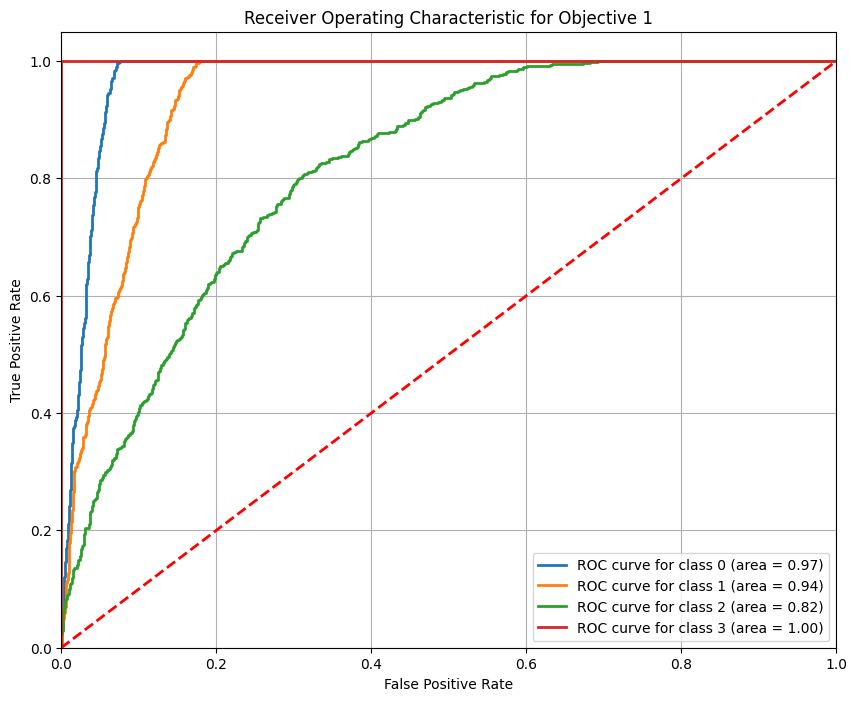

In [ ]:
# Calculate predicted probabilities
y_prob = clf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = len(np.unique(y))  # Number of classes
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Compute ROC curve
    fpr[i], tpr[i], _ = roc_curve((y_test == np.unique(y)[i]).astype(int), y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize = (10, 8))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw = 2, label = "ROC curve for class {0} (area = {1:0.2f})".format(np.unique(y)[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color = "red", lw = 2, linestyle = "--")  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for Objective 1")
plt.legend(loc = "lower right")
plt.grid()
plt.show()

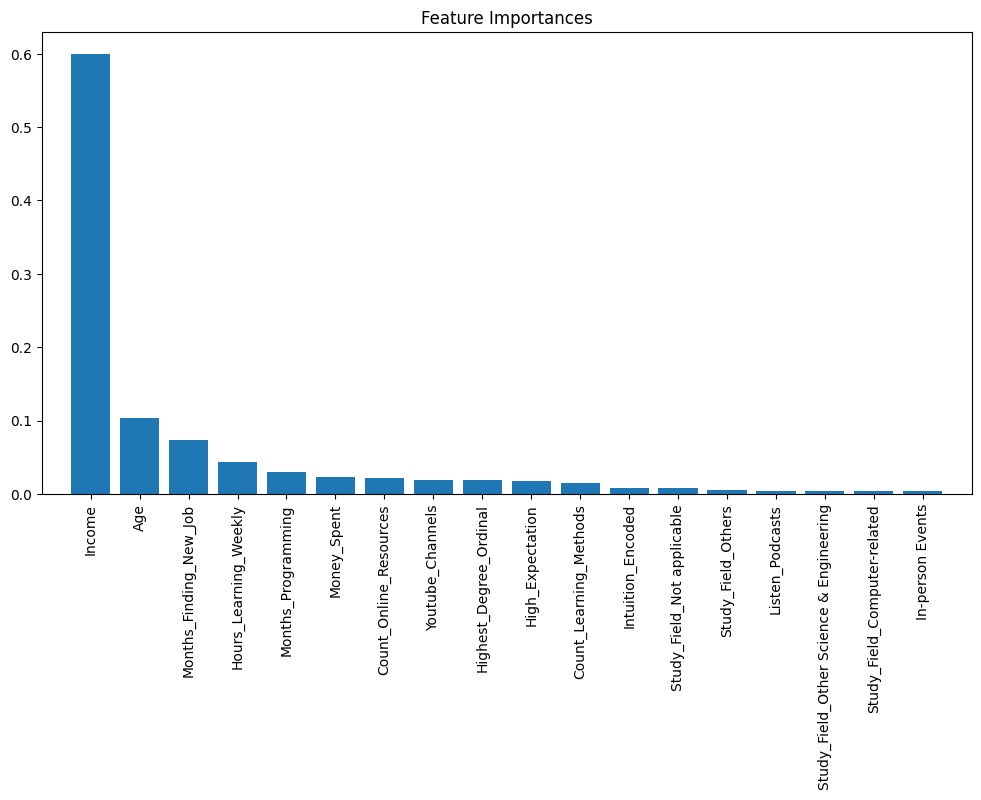

In [ ]:
# Feature Importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize = (12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align = "center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.show()

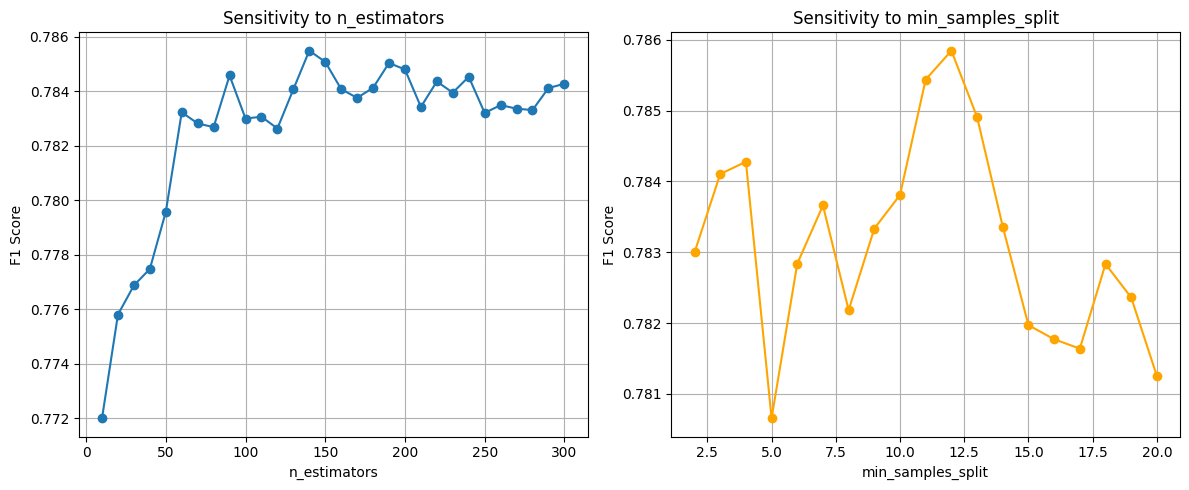

In [ ]:
# Define a range for n_estimators and min_samples_split to test
n_estimators_range = np.arange(10, 301, 10)  # 10 to 300 with a step of 10
min_samples_split_range = np.arange(2, 21, 1)  # 2 to 20 with a step of 1

# Store results
n_estimators_scores = []
min_samples_split_scores = []

# OAT Sensitivity for 'n_estimators' (vary n_estimators, keep min_samples_split fixed)
for n in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n, min_samples_split=2, random_state=0)  # min_samples_split fixed at 2
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted')
    n_estimators_scores.append(scores.mean())

# OAT Sensitivity for 'min_samples_split' (vary min_samples_split, keep n_estimators fixed)
for min_samples_split in min_samples_split_range:
    clf = RandomForestClassifier(n_estimators=100, min_samples_split=min_samples_split, random_state=0)  # n_estimators fixed at 100
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='f1_weighted')
    min_samples_split_scores.append(scores.mean())

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for n_estimators
axes[0].plot(n_estimators_range, n_estimators_scores, marker='o')
axes[0].set_title("Sensitivity to n_estimators")
axes[0].set_xlabel("n_estimators")
axes[0].set_ylabel("F1 Score")
axes[0].grid()

# Plot for min_samples_split
axes[1].plot(min_samples_split_range, min_samples_split_scores, marker='o', color='orange')
axes[1].set_title("Sensitivity to min_samples_split")
axes[1].set_xlabel("min_samples_split")
axes[1].set_ylabel("F1 Score")
axes[1].grid()

plt.tight_layout()
plt.show()


## Failure analysis

In [ ]:
# Create a DataFrame for misclassified instances
misclassified_mask = y_test != y_test_pred  # Create a boolean mask for misclassifications
misclassified_instances = X_test[misclassified_mask]  # Use the mask to filter X_test

# Add true and predicted labels to the misclassified DataFrame
misclassified_instances_df = pd.DataFrame(misclassified_instances)
misclassified_instances_df['True_Label'] = y_test[misclassified_mask]  # Get true labels using the mask
misclassified_instances_df['Predicted_Label'] = y_test_pred[misclassified_mask]  # Get predicted labels using the mask

In [ ]:
# Analyze misclassified instances for each class
for class_label in np.unique(y_test):
    print(f"\n--- Analysis of Misclassifications for Class: {class_label} ---")

    # Instances where the true label is the class label but predicted incorrectly
    class_misclassifications = misclassified_instances_df[misclassified_instances_df['True_Label'] == class_label]

    # Number of misclassifications
    num_misclassified = len(class_misclassifications)

    if num_misclassified > 0:
        print("Number of misclassifications:", num_misclassified)
        print("Example Misclassifications:\n", class_misclassifications.head())
        print("\nFeature Distributions of Misclassifications:\n", class_misclassifications.describe())
    else:
        print("No misclassifications for this class.")


--- Analysis of Misclassifications for Class: 0 ---
Number of misclassifications: 11
Example Misclassifications:
       Intuition_Encoded   Age  Income  High_Expectation  \
1251                1.0  30.0     2.0               1.0   
575                 3.0  27.0     2.0               1.0   
44                  3.0  44.0     2.0               1.0   
712                 3.0  24.0     2.0               1.0   
2085                3.0  23.0     2.0               1.0   

      Highest_Degree_Ordinal  Hours_Learning_Weekly  Months_Programming  \
1251                     6.0                   10.0                 1.0   
575                      4.0                   30.0                 6.0   
44                       3.0                   60.0                 3.0   
712                      4.0                   30.0                 6.0   
2085                     4.0                   50.0                 0.5   

      Money_Spent  Count_Learning_Methods  Count_Online_Resources  \
1251      

In [ ]:
misclassified_instances_df.head(10)

,Intuition_Encoded,Age,Income,High_Expectation,Highest_Degree_Ordinal,Hours_Learning_Weekly,Months_Programming,Money_Spent,Count_Learning_Methods,Count_Online_Resources,In-person Events,Listen_Podcasts,Youtube_Channels,Months_Finding_New_Job,Study_Field_Computer-related,Study_Field_Not applicable,Study_Field_Other Science & Engineering,Study_Field_Others,True_Label,Predicted_Label
7890,3.0,35.0,2.0,1.0,4.0,30.0,2.0,100.0,3.0,5.0,0.0,0.0,4.0,24.0,0.0,0.0,0.0,1.0,2,0
6035,3.0,30.0,1.0,1.0,6.0,26.0,5.0,0.0,1.0,3.0,0.0,1.0,0.0,24.0,0.0,1.0,0.0,0.0,1,2
7922,3.0,26.0,1.0,1.0,3.0,14.0,2.0,0.0,2.0,3.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2,1
9787,0.0,26.0,1.0,1.0,6.0,20.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,2,1
7173,3.0,22.0,1.0,0.0,4.0,20.0,48.0,100.0,1.0,8.0,0.0,1.0,8.0,24.0,0.0,0.0,1.0,0.0,2,1
8667,3.0,21.0,2.0,1.0,6.0,6.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,2,0
9609,3.0,20.0,1.0,1.0,6.0,5.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,2,1
9619,3.0,46.0,2.0,1.0,6.0,15.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,0
6945,3.0,0.0,1.0,1.0,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1,2
7170,3.0,33.0,2.0,1.0,4.0,30.0,7.0,2000.0,3.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,2,0


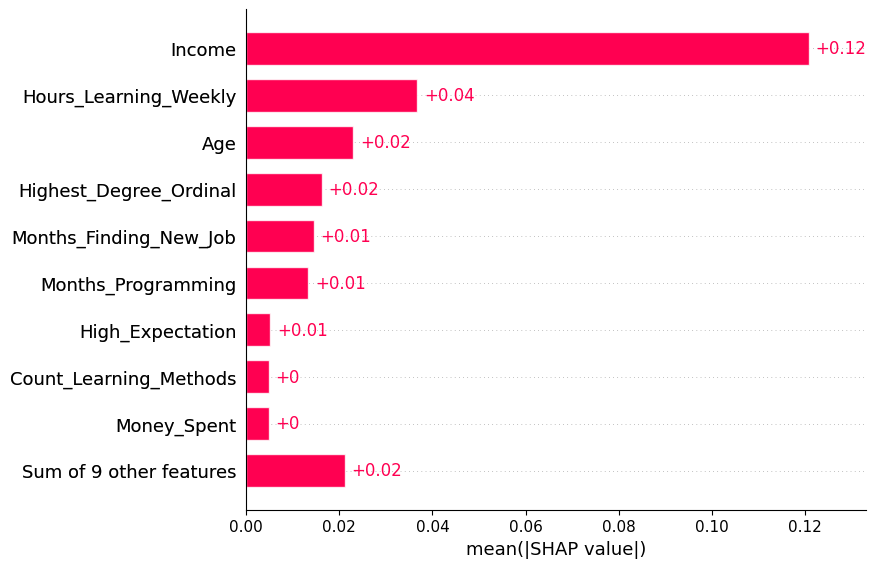

In [ ]:
# Use SHAP TreeExplainer for Random Forest
clf.fit(X_train, y_train)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Select a specific misclassified instance (you can choose the first one or any other)
misclassified_instance_index = 2  # Change this index to select another instance
misclassified_instance = misclassified_instances_df.iloc[misclassified_instance_index]

# Get the SHAP values for the misclassified instance
true_label_index = int(misclassified_instance['True_Label'])
shap_values_instance = shap_values[true_label_index][misclassified_instance_index]

# Create an Explanation object for the SHAP values
explanation = shap.Explanation(values=shap_values[true_label_index],
                                feature_names=X_test.columns,
                                base_values=explainer.expected_value[true_label_index],
                                data=X_test[misclassified_indices].values)


In [ ]:
# Create the SHAP bar plot
shap.plots.bar(explanation)

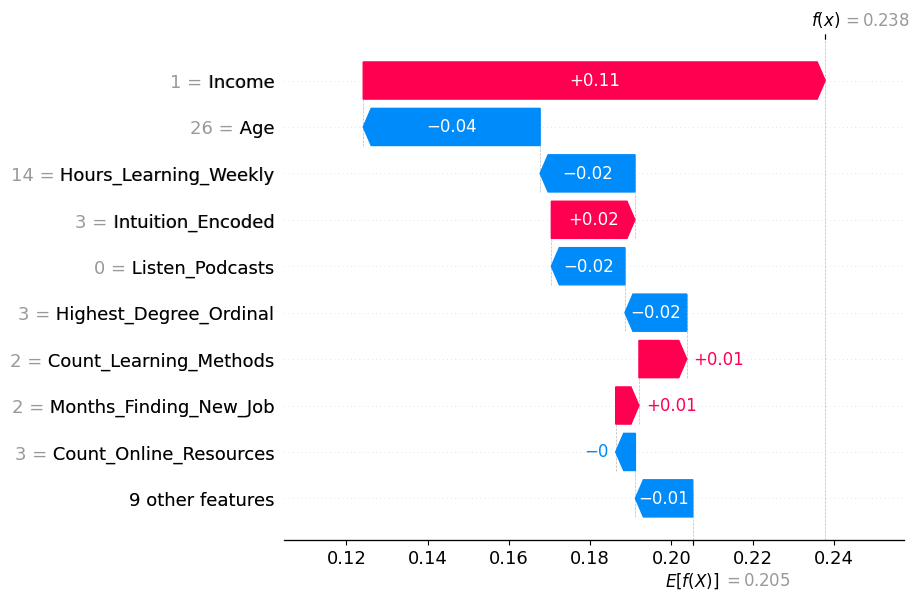

In [ ]:
shap.plots.waterfall(explanation[misclassified_instance_index])

In [ ]:
misclassified_instance

Intuition_Encoded                           3.0
Age                                        26.0
Income                                      1.0
High_Expectation                            1.0
Highest_Degree_Ordinal                      3.0
Hours_Learning_Weekly                      14.0
Months_Programming                          2.0
Money_Spent                                 0.0
Count_Learning_Methods                      2.0
Count_Online_Resources                      3.0
In-person Events                            1.0
Listen_Podcasts                             0.0
Youtube_Channels                            1.0
Months_Finding_New_Job                      2.0
Study_Field_Computer-related                0.0
Study_Field_Not applicable                  0.0
Study_Field_Other Science & Engineering     0.0
Study_Field_Others                          1.0
True_Label                                  2.0
Predicted_Label                             1.0
Name: 7922, dtype: float64

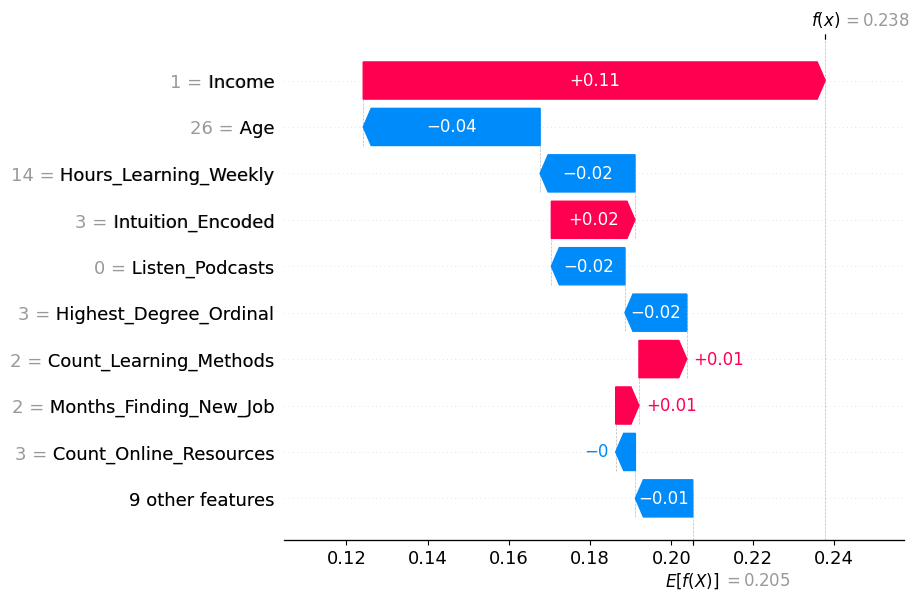

In [ ]:
# Select a specific misclassified instance (you can choose the first one or any other)
misclassified_instance_index = 2  # Change this index to select another instance
misclassified_instance = misclassified_instances_df.iloc[misclassified_instance_index]

# Get the true label and the predicted label
true_label = int(misclassified_instance['True_Label'])
predicted_label = int(misclassified_instance['Predicted_Label'])

# Get the SHAP values for the misclassified instance for the true label
shap_values_instance = shap_values[true_label][misclassified_instance_index]

# Create an Explanation object for the SHAP values
explanation = shap.Explanation(
    values=shap_values[true_label][misclassified_instance_index],
    feature_names=X_test.columns,
    base_values=explainer.expected_value[true_label],
    data=misclassified_instance[:-2]  # Exclude True_Label and Predicted_Label
)

# Create a SHAP waterfall plot
shap.plots.waterfall(explanation)

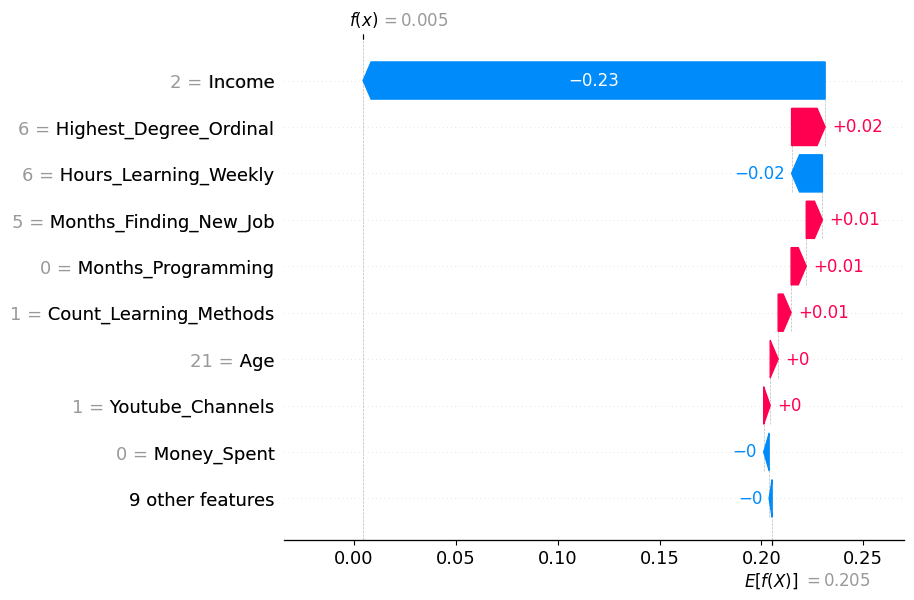

In [ ]:
# Select a specific misclassified instance (you can choose the first one or any other)
misclassified_instance_index = 5  # Change this index to select another instance
misclassified_instance = misclassified_instances_df.iloc[misclassified_instance_index]

# Get the true label and the predicted label
true_label = int(misclassified_instance['True_Label'])
predicted_label = int(misclassified_instance['Predicted_Label'])

# Get the SHAP values for the misclassified instance for the true label
shap_values_instance = shap_values[true_label][misclassified_instance_index]

# Create an Explanation object for the SHAP values
explanation = shap.Explanation(
    values=shap_values[true_label][misclassified_instance_index],
    feature_names=X_test.columns,
    base_values=explainer.expected_value[true_label],
    data=misclassified_instance[:-2]  # Exclude True_Label and Predicted_Label
)

# Create a SHAP waterfall plot
shap.plots.waterfall(explanation)

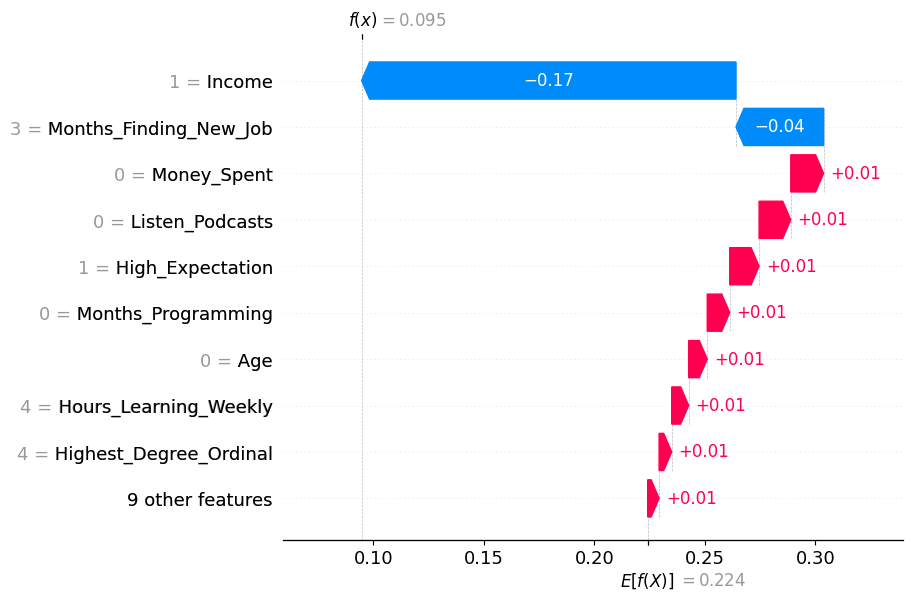

In [ ]:
# Select a specific misclassified instance (you can choose the first one or any other)
misclassified_instance_index = 8  # Change this index to select another instance
misclassified_instance = misclassified_instances_df.iloc[misclassified_instance_index]

# Get the true label and the predicted label
true_label = int(misclassified_instance['True_Label'])
predicted_label = int(misclassified_instance['Predicted_Label'])

# Get the SHAP values for the misclassified instance for the true label
shap_values_instance = shap_values[true_label][misclassified_instance_index]

# Create an Explanation object for the SHAP values
explanation = shap.Explanation(
    values=shap_values[true_label][misclassified_instance_index],
    feature_names=X_test.columns,
    base_values=explainer.expected_value[true_label],
    data=misclassified_instance[:-2]  # Exclude True_Label and Predicted_Label
)

# Create a SHAP waterfall plot
shap.plots.waterfall(explanation)

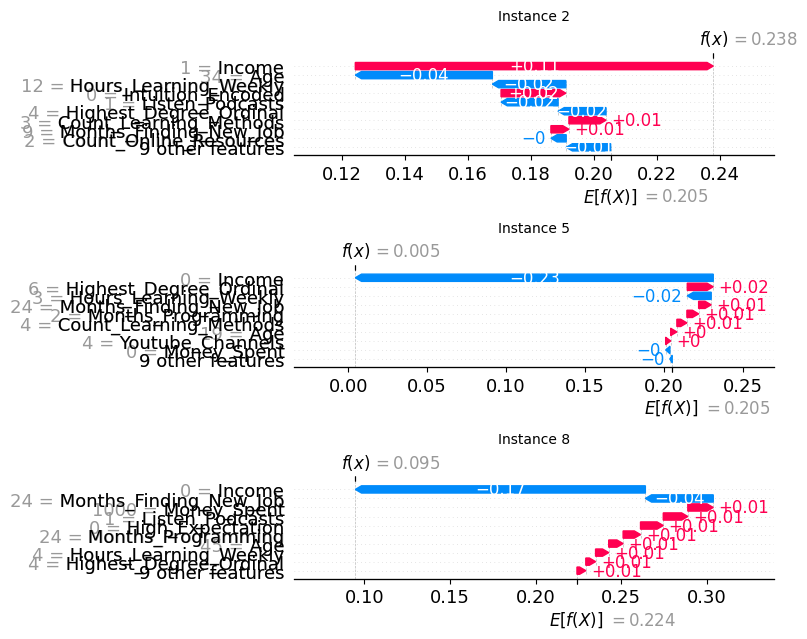

In [ ]:
# Select three different misclassified instances (adjust indices as needed)
indices = [2, 5, 8]  # Example indices of misclassified instances

# Create a figure with subplots (1 row, 3 columns)
fig, axes = plt.subplots(3, 1, figsize=(12, 18))  # Adjust the size as needed

# Loop through the indices and create waterfall plots for each
for i, idx in enumerate(indices):
    # Get the true label index and corresponding SHAP values for the instance
    true_label_index = int(misclassified_instances_df.iloc[idx]['True_Label'])
    shap_values_instance = shap_values[true_label_index][idx]

    # Create an explanation object for the SHAP values
    explanation = shap.Explanation(
        values=shap_values_instance,
        base_values=explainer.expected_value[true_label_index],
        feature_names=X_test.columns,
        data=X_test.iloc[idx]
    )

    # Create each waterfall plot and save it to the current axis
    plt.sca(axes[i])  # Set the current axis for plotting
    shap.plots.waterfall(explanation, show=False)  # Plot the waterfall plot

    # Add a title to each subplot (optional)
    axes[i].set_title(f'Instance {idx}', fontsize=10)

# Adjust layout to prevent overlap
plt.subplots_adjust(hspace=0.5)
plt.tight_layout()

# Show the complete subplot figure
plt.show()



End